# Exploratory Data Analysis(EDA)
### Abhiram MV
#### Task 3 - Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
#### As a business manager, try to find out the weak areas where you can work to make more profit.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings #Ignore the warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SampleSuperstore.csv') #reading the CSV and converting to dataframe

In [3]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


The dataset you've provided appears to be a retail sales dataset with various features related to transactions. Here's a breakdown of the columns and their likely meanings:

Columns in the Dataset
1. Ship Mode: Represents the method used for shipping (e.g., Standard Class, Second Class). It may impact delivery speed and customer satisfaction.
2. Segment: Indicates the type of customer (e.g., Consumer, Corporate). Different segments can exhibit varying purchasing behaviors.
3. Country: The country where the transaction took place. In this case, all entries are from the United States.
4. City: The city of the transaction, allowing for geographical analysis.
5. State: The state in which the city is located, which can provide insights into regional performance.
6. Postal Code: The postal code for more granular geographical analysis.
7. Region: The broader geographical area, such as the North, South, East, or West regions of the United States.
8. Category: The main category of the product sold (e.g., Furniture, Office Supplies, Technology).
9. Sub-Category: A more specific classification of the product within the main category (e.g., Chairs, Tables, Phones).
10. Sales: The total sales amount for the transaction. This is usually a continuous numeric value.
11. Quantity: The number of units sold in the transaction. This can help analyze sales volume.
12. Discount: The discount applied to the sales price, typically expressed as a proportion (e.g., 0.00 means no discount, 0.20 means a 20% discount).
13. Profit: The profit earned from the transaction, which is crucial for understanding the financial performance of sales.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
#deleting rows with duplicate values
df.drop_duplicates(inplace = True)

In [8]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
# Sales and Profit by Category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
category_profit = df.groupby('Category')['Profit'].sum().reset_index()


In [10]:
category_sales

,Category,Sales
0,Furniture,741306.3133
1,Office Supplies,718735.2440
2,Technology,836154.0330


In [11]:
category_profit

,Category,Profit
0,Furniture,18421.8137
1,Office Supplies,122364.6608
2,Technology,145454.9481


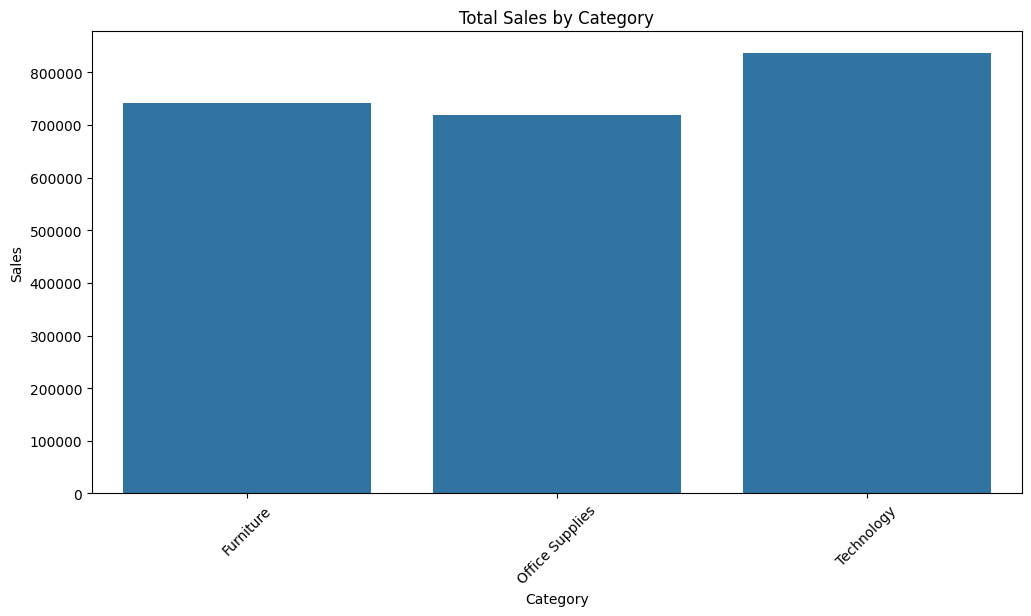

In [12]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()


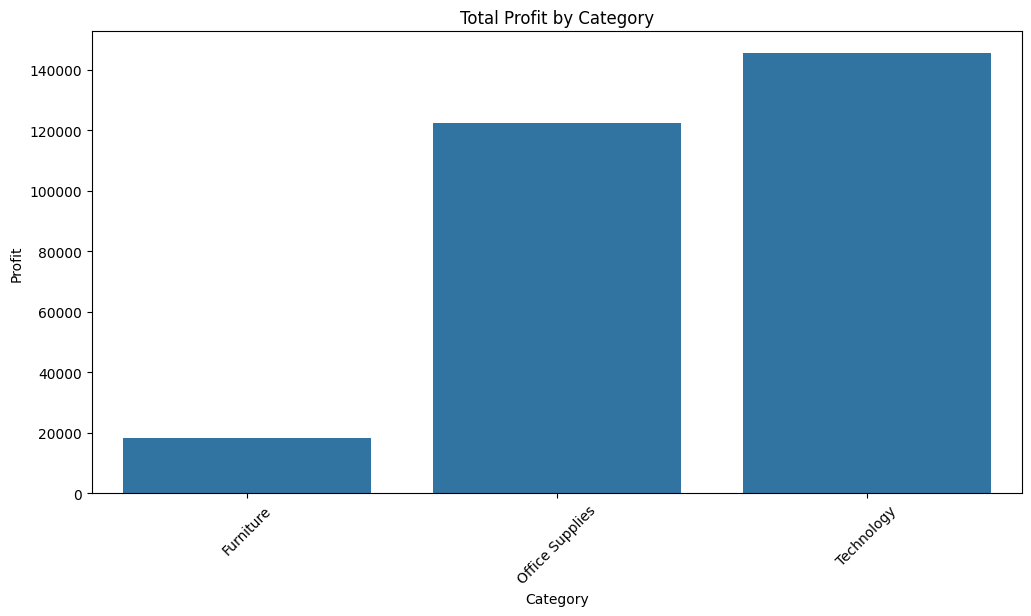

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit', data=category_profit)
plt.title('Total Profit by Category')
plt.xticks(rotation=45)
plt.show()


Even though furniture has high sales, the profit seems to be very low. This might be due to discounts. Lets do further analysis

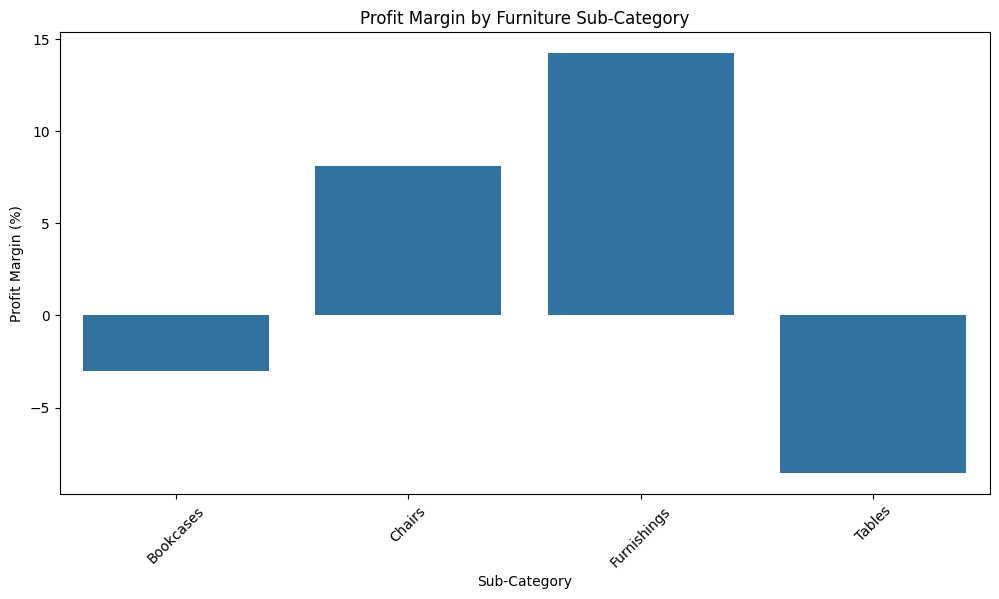

In [14]:
# Calculate Profit Margin

df_furniture = df[df['Category'] == 'Furniture']
df_furniture['Profit Margin (%)'] = (df_furniture['Profit'] / df_furniture['Sales']) * 100

# Use a list to select multiple columns for aggregation
# First, we will group by 'Sub-Category' and sum 'Sales' and 'Profit'
profit_margin_summary = df_furniture.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()

# Calculate the overall Profit Margin (%) for each sub-category
profit_margin_summary['Profit Margin (%)'] = (profit_margin_summary['Profit'] / profit_margin_summary['Sales']) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Profit Margin (%)', data=profit_margin_summary)
plt.title('Profit Margin by Furniture Sub-Category')
plt.xticks(rotation=45)
plt.show()

In [15]:
profit_margin_summary

,Sub-Category,Sales,Profit,Profit Margin (%)
0,Bookcases,114879.9963,-3472.5560,-3.022768
1,Chairs,327777.7610,26567.1278,8.105226
2,Furnishings,91683.0240,13052.7230,14.236794
3,Tables,206965.5320,-17725.4811,-8.564460


Tables is performing badly and Furnishings are doing well

In [21]:
# Calculate average discount by sub-category
discount_analysis = df_furniture.groupby('Sub-Category')[['Discount', 'Profit']].mean().reset_index()


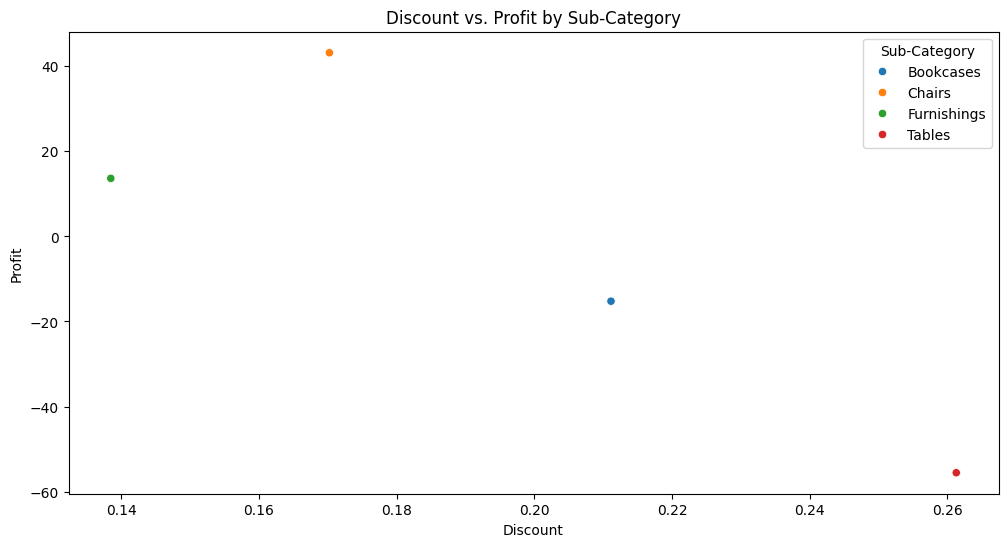

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Discount', y='Profit', hue='Sub-Category', data=discount_analysis)
plt.title('Discount vs. Profit by Sub-Category')
plt.show()


In [24]:
df_tables_sub_cat = df[df['Sub-Category'] == 'Tables']

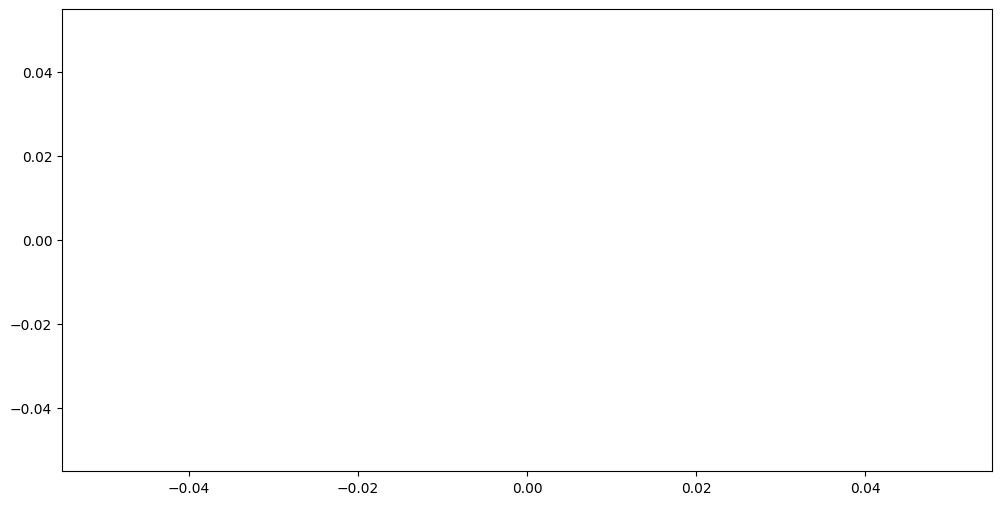

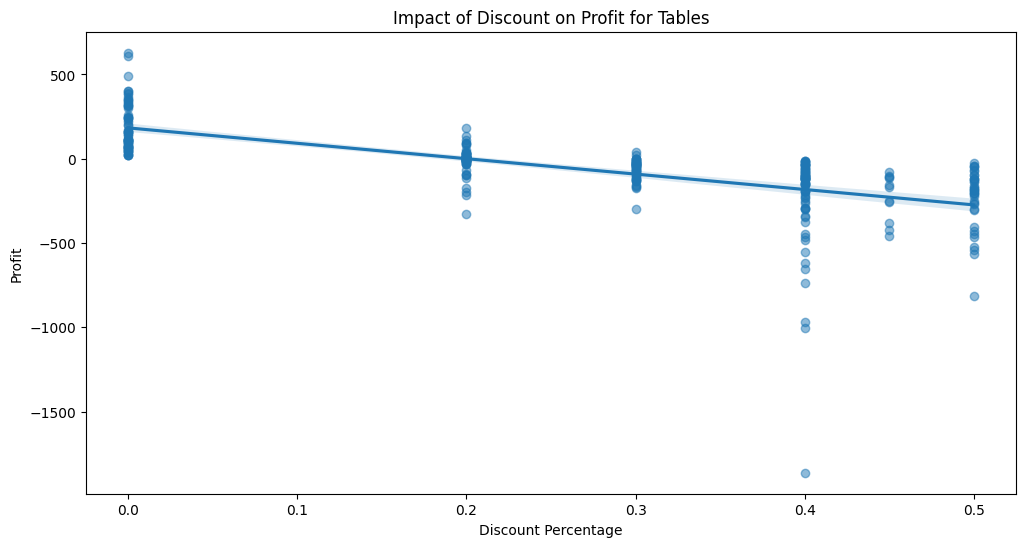

In [33]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df_tables_sub_cat, x='Discount', y='Profit', scatter_kws={'alpha':0.5})
plt.title('Impact of Discount on Profit for Tables')
plt.xlabel('Discount Percentage')
plt.ylabel('Profit')
plt.show()


We might have to consider reducing the discount on tables. It is impacting profit

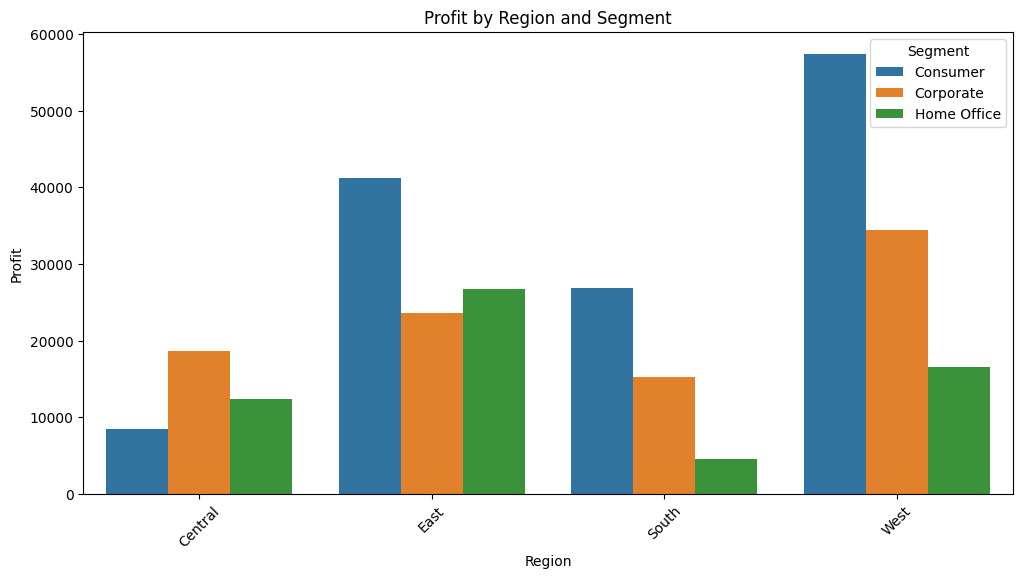

In [28]:
region_segment_profit = df.groupby(['Region', 'Segment'])['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Profit', hue='Segment', data=region_segment_profit)
plt.title('Profit by Region and Segment')
plt.xticks(rotation=45)
plt.show()


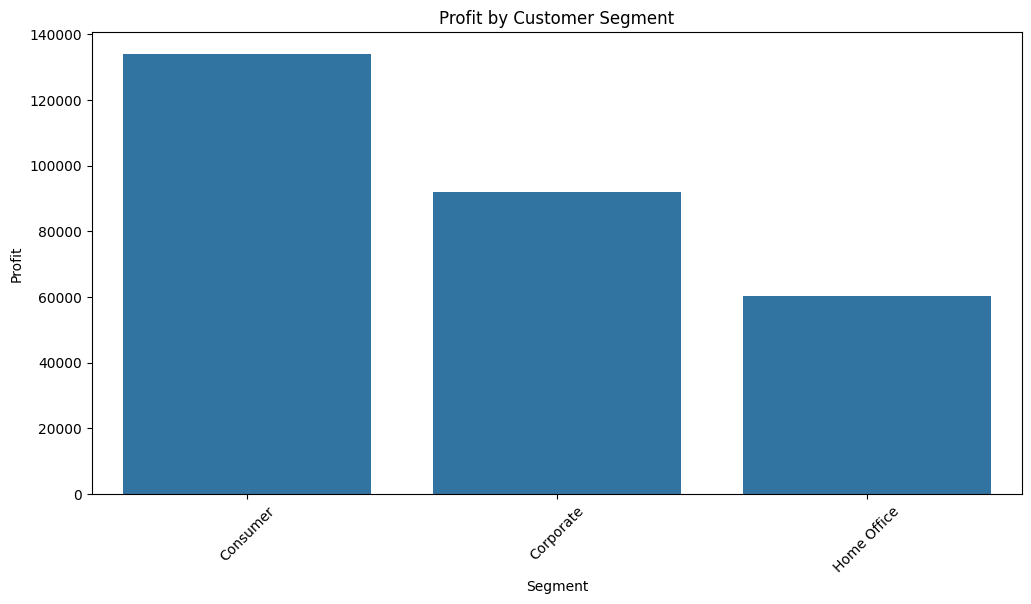

In [30]:
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Profit', data=segment_profit)
plt.title('Profit by Customer Segment')
plt.xticks(rotation=45)
plt.show()


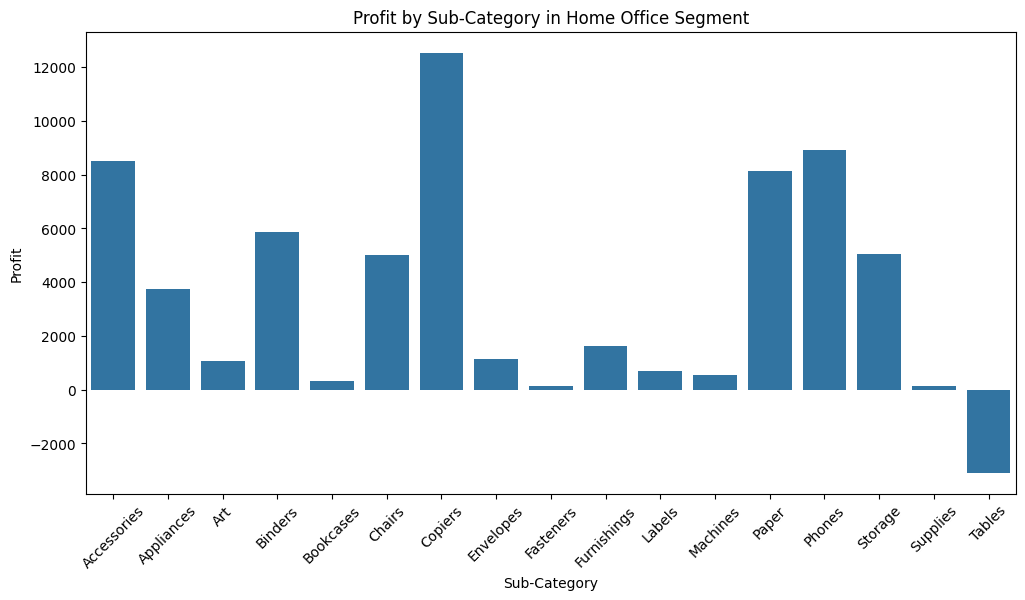

In [36]:
home_office_data = df[df['Segment'] == 'Home Office']
sub_category_profit = home_office_data.groupby('Sub-Category')['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Profit', data=sub_category_profit)
plt.title('Profit by Sub-Category in Home Office Segment')
plt.xticks(rotation=45)
plt.show()


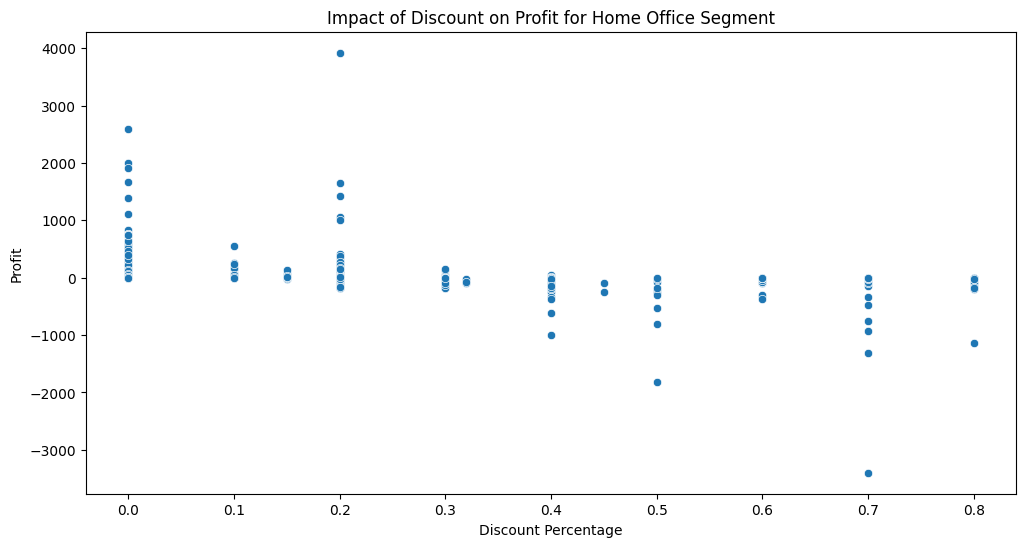

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=home_office_data, x='Discount', y='Profit')
plt.title('Impact of Discount on Profit for Home Office Segment')
plt.xlabel('Discount Percentage')
plt.ylabel('Profit')
plt.show()


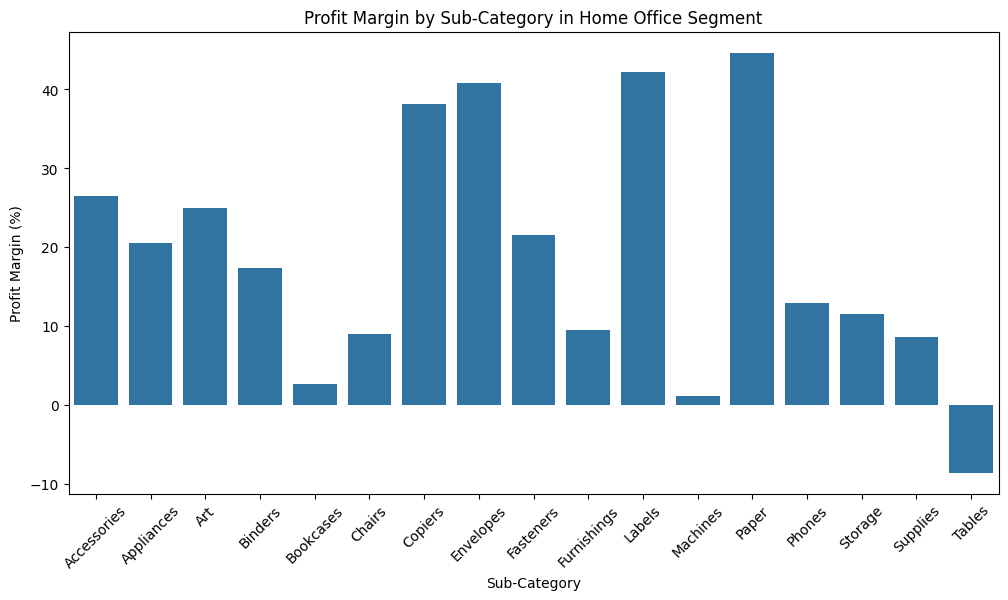

In [38]:
home_office_sales_profit = home_office_data.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
home_office_sales_profit['Profit Margin (%)'] = (home_office_sales_profit['Profit'] / home_office_sales_profit['Sales']) * 100
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Profit Margin (%)', data=home_office_sales_profit)
plt.title('Profit Margin by Sub-Category in Home Office Segment')
plt.xticks(rotation=45)
plt.show()


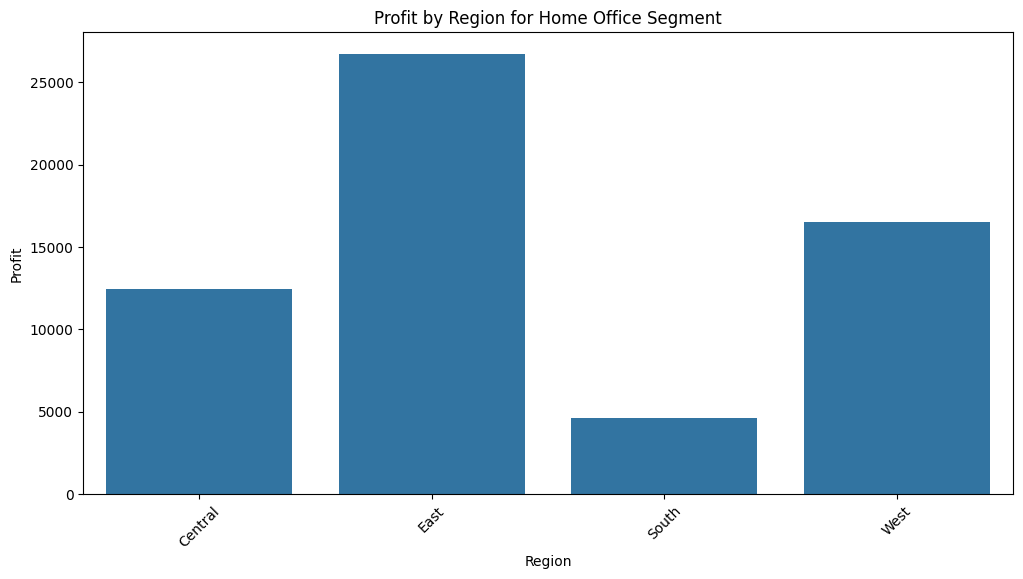

In [39]:
home_office_region_profit = home_office_data.groupby('Region')['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Profit', data=home_office_region_profit)
plt.title('Profit by Region for Home Office Segment')
plt.xticks(rotation=45)
plt.show()


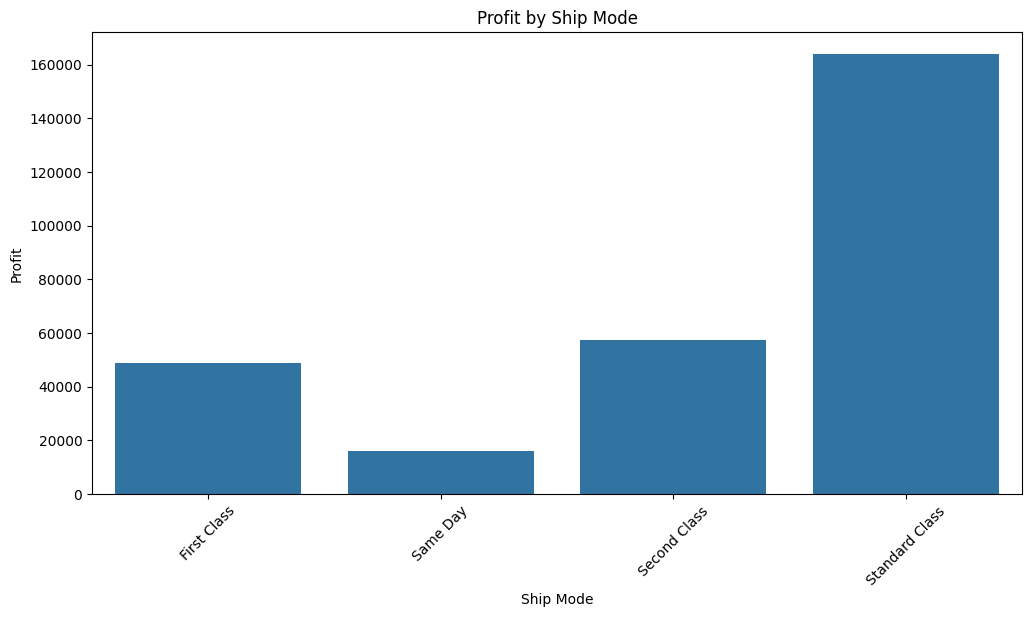

In [34]:
ship_mode_profit = df.groupby('Ship Mode')['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Ship Mode', y='Profit', data=ship_mode_profit)
plt.title('Profit by Ship Mode')
plt.xticks(rotation=45)
plt.show()
